In [ ]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동 (코랩 새로 켤 때마다 지워지기 땜에)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 구글 GPU 좀 써보자

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## train_DS 와 test_DS 구경

In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [ ]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [ ]:
train_DS.classes # . 뒤에서 탭 하면 이것저것 볼 수 있는 게 뜬다

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

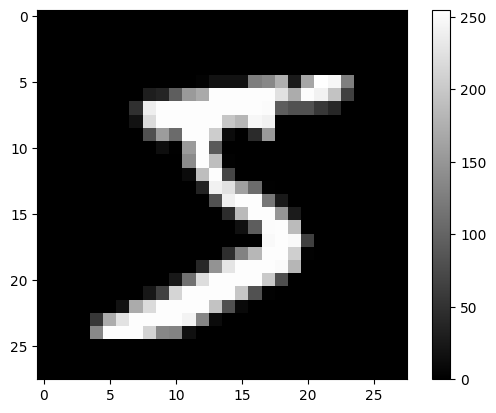

In [ ]:
plt.imshow(train_DS.data[0], cmap="gray")
plt.colorbar()

In [ ]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [ ]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
train_DL.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.uint8
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,

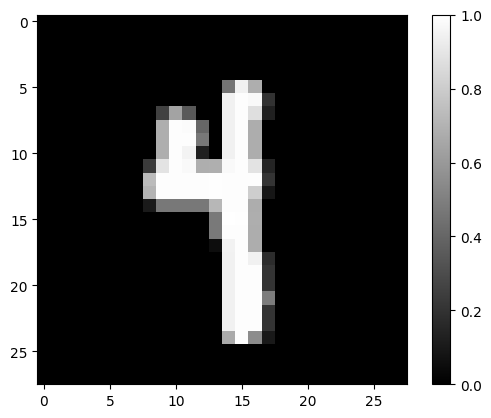

In [ ]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자 # next(iter(train_DS)) 는 한장만 꺼내기
# ToTensor 의 역할
# 1. tensor 로 바꾸고
# 2. 개채행열로 바꾸고
# 3. 0~1 사이로 바꾸고 (int -> float)
print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
print(train_DS.data[0])

print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0])

plt.imshow(x_batch[0].squeeze(),cmap='gray')
plt.colorbar()
print(y_batch[0])

## 본격적으로 model 만들기!

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(nn.Linear(28*28, 100),
                                 nn.ReLU(),
                                 nn.Linear(100, 10))
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x

In [ ]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [ ]:
model=MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련시키기!

In [ ]:
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

def Train(model, train_DL, criterion, optimizer, EPOCH):

    loss_history=[]
    NoT=len(train_DL.dataset) # The number of training data

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0] # batch loss # BATCH_SIZE를 곱하면 마지막 18개도 32개를 곱하니까..
            rloss += loss_b # running loss
        # print loss
        loss_e = rloss/NoT # epoch loss
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {loss_e:.3f}")
        print("-"*20)

    return loss_history

## Cross Entropy 확인 (왜 모델에 softmax를 안붙였을까?)



In [ ]:
# cross entropy 구하는 여러가지 방법
import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch) # softmax가 내장
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss() # softmax가 내장
print(criterion(y_hat,y_batch))

# 방법 3
soft = nn.Softmax(dim=1)
y_hat_soft = soft(y_hat)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
    print(i,val)
    loss += -torch.log(val[y_batch[i]])
print(loss/3) # 평균이 내장되어있음을 알 수 있다

tensor([[-0.0084, -1.1502,  1.0612, -1.9840, -0.4040],
        [-0.7027, -1.3627,  0.9823,  0.1805,  0.8047],
        [ 0.8550,  0.9347, -1.9359,  0.3131, -1.3546]])
tensor([1, 2, 2])
tensor(2.5121)
tensor(2.5121)
tensor([[0.1982, 0.0633, 0.5776, 0.0275, 0.1334],
        [0.0722, 0.0373, 0.3895, 0.1747, 0.3262],
        [0.3526, 0.3819, 0.0216, 0.2051, 0.0387]])
0 tensor([0.1982, 0.0633, 0.5776, 0.0275, 0.1334])
1 tensor([0.0722, 0.0373, 0.3895, 0.1747, 0.3262])
2 tensor([0.3526, 0.3819, 0.0216, 0.2051, 0.0387])
tensor(2.5121)


Epoch: 1, train loss: 0.312
--------------------
Epoch: 2, train loss: 0.141
--------------------
Epoch: 3, train loss: 0.096
--------------------
Epoch: 4, train loss: 0.073
--------------------
Epoch: 5, train loss: 0.058
--------------------


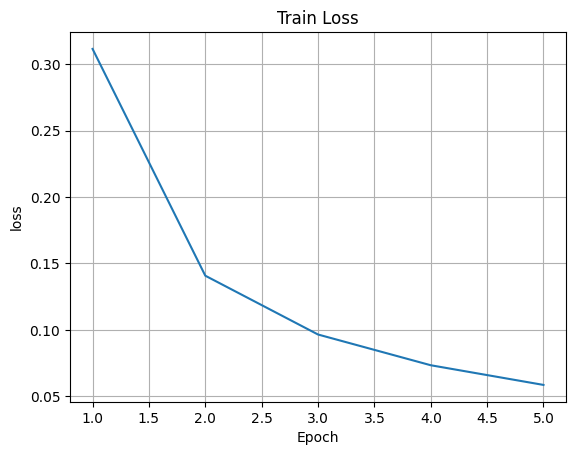

In [ ]:
loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Train Loss")
plt.grid()

## 모델 저장하기 & 불러오기

In [ ]:
# import os # 이건 내 필기용
# os.mkdir("/content/drive/MyDrive/Colab Notebooks/results") # 이건 내 필기용

save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP.pt"
torch.save(model.state_dict(), save_model_path)

In [ ]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))
# map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음

<ipython-input-66-b0fa422c3ef9>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))


<All keys matched successfully>

## 모델 테스트하기

In [ ]:
def Test(model, test_DL):
    model.eval() # test mode로 전환
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # corrects accumulation
            pred = y_hat.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item() # torch.eq(pred, y_batch).sum().item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({accuracy_e:.1f} %)")
    return round(accuracy_e,1)

In [ ]:
Test(load_model, test_DL)

Test accuracy: 9759/10000 (97.6%)


97.6

In [ ]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")
    # print(x_batch.shape)

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

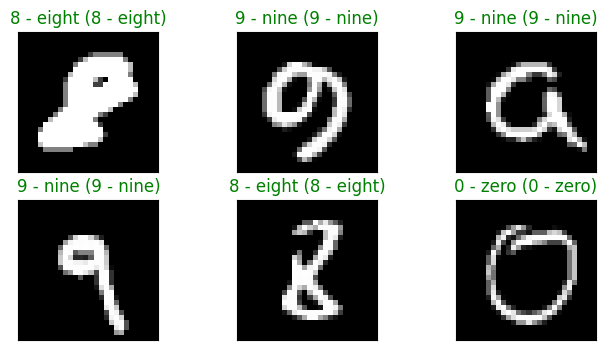

In [ ]:
Test_plot(load_model, test_DL)

In [ ]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [ ]:
print(count_params(load_model))

79510


## confusion matrix

In [ ]:
def get_conf(model, test_DL):
    N = len(test_DL.dataset.classes)
    model.eval()
    with torch.no_grad():
        confusion = torch.zeros(N,N)
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # accuracy
            pred = y_hat.argmax(dim=1)

            confusion += torch.bincount(N * y_batch.cpu() + pred.cpu(), minlength=N**2).reshape(N, N)
            # confusion matrix는 무조건 10x10이 되어야 하는데 만약 마지막 label에 대해 예측을 모두 실패하면 100개보다 작아질 수 있기 때문에 minlength를 설정

    confusion = confusion.numpy()

    return confusion

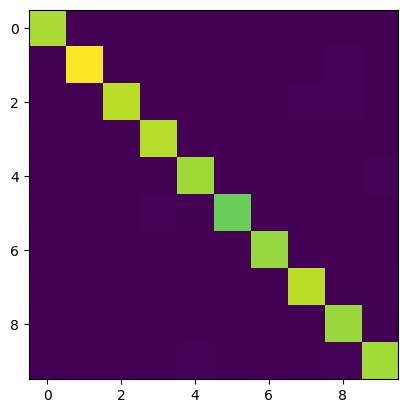

In [ ]:
confusion = get_conf(load_model, test_DL)
plt.imshow(confusion)

In [ ]:
import numpy as np

def plot_confusion_matrix(confusion, classes=None):
    N = confusion.shape[0]
    accuracy=np.trace(confusion)/np.sum(confusion) * 100

    # confusion = confusion/np.sum(confusion, axis=1)
    plt.figure(figsize=(10,7))
    plt.imshow(confusion, cmap="Blues")
    plt.title("confusion matrix")
    plt.colorbar()

    for i in range(N):
        for j in range(N):
            plt.text(j,i, round(confusion[i,j]),
                     horizontalalignment="center", fontsize=10,
                     color="white" if confusion[i,j] > np.max(confusion) / 1.5 else "black")

    if classes is not None:
        plt.xticks(range(N), classes)
        plt.yticks(range(N), classes)
    else:
        plt.xticks(range(N))
        plt.yticks(range(N))

    plt.xlabel(f"Predicted label \n accuracy = {accuracy:.1f} %")
    plt.ylabel("True label")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0 - zero'),
  Text(1, 0, '1 - one'),
  Text(2, 0, '2 - two'),
  Text(3, 0, '3 - three'),
  Text(4, 0, '4 - four'),
  Text(5, 0, '5 - five'),
  Text(6, 0, '6 - six'),
  Text(7, 0, '7 - seven'),
  Text(8, 0, '8 - eight'),
  Text(9, 0, '9 - nine')])

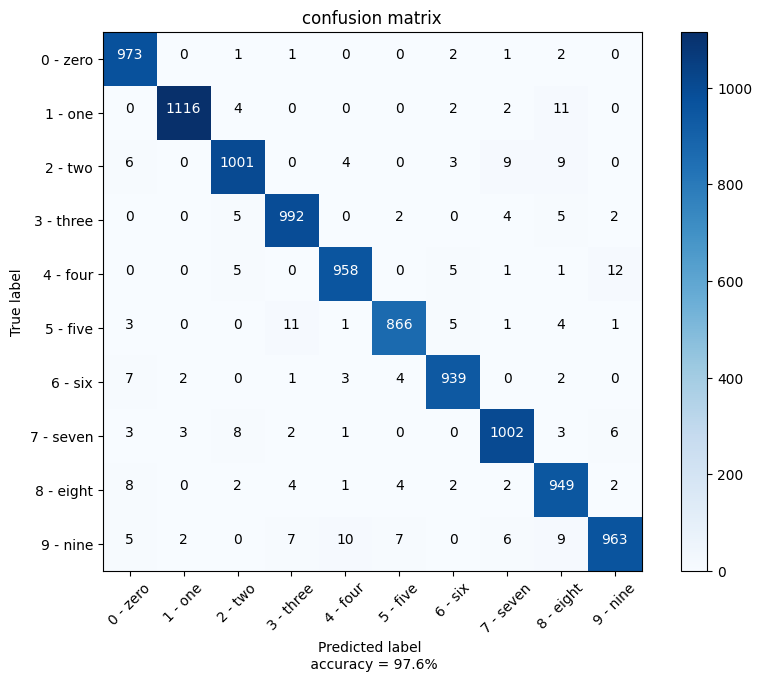

In [ ]:
confusion = get_conf(load_model, test_DL)
plot_confusion_matrix(confusion, test_DL.dataset.classes)
plt.xticks(rotation=45)